In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
from peakdetect import peakdetect
from scipy.ndimage.interpolation import shift
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import newton
%matplotlib inline

In [2]:
engine = create_engine('sqlite+pysqlite:///../SQL/72_8.db')

In [3]:
import time
start_time = time.time()
ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
#Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
#PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
#ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
#RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

197.330302


In [4]:
RawADCdf.head()

NameError: name 'RawADCdf' is not defined

In [ ]:
tmp = RawADCdf.iloc[:4,10:]
plt.plot((tmp.values - tmp.mean(axis=1).values[:,None]+np.array([[0],[4],[8],[16]])).T)

In [ ]:
RawADCdf[RawADCdf['EventID']==0].iloc[:,3:].T.plot(legend=None)
plt.ylim([250,500])

In [ ]:
RawADCdf[RawADCdf['PadNum']==-11].iloc[:10,30:].T.plot(legend=None)
plt.ylim([350,370])

In [ ]:
RawADCdf[(RawADCdf['PadNum']==220)].iloc[:1,10:].T.plot(legend=None)


In [19]:
def Process(Event):
    e = Event[Event.iloc[:,13:-10].max(axis=1)>200]
    
    mesh = e.iloc[:,3:].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh1_df = ADCdf.groupby('EventID').apply(Process)
mesh1_df = mesh1_df.reset_index()

end_time = time.time()
print end_time-start_time

5.95081305504


In [11]:
def Process(Event):

    mesh =  Event.iloc[:,3:].sum(axis=0)
    return mesh
mesh_df = ADCdf.groupby('EventID').apply(Process)
mesh_df = mesh_df.reset_index()


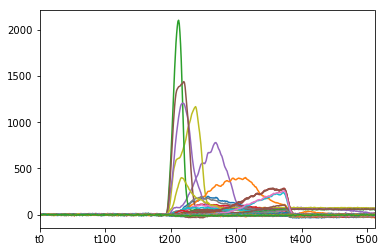

In [8]:
ADCdf[ADCdf['EventID']==0].iloc[:,3:].T.plot(legend=None)
#plt.ylim([-50,50])

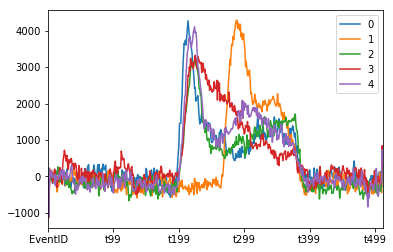

In [23]:
%matplotlib inline
mesh_df.head().T.plot()

In [15]:
status_df = pd.read_csv("72_8_t0.csv")
status_df.columns = ['EventID','trigger']

(180, 250)

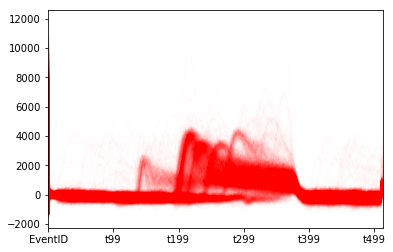

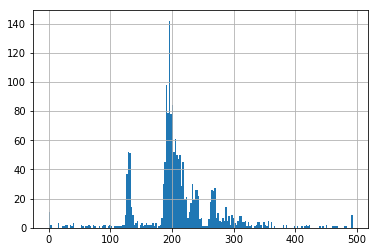

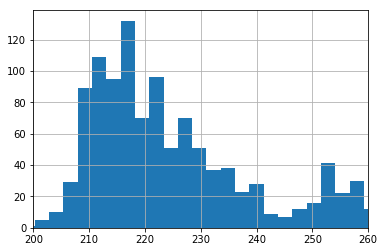

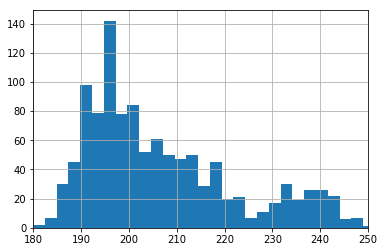

In [33]:
def FindLeadingEdge(e):
    
    event= e.iloc[10:-10]
    grad = np.gradient(event.values)
    mx = np.argmax(grad)
    my = grad[mx]
    
    tmp = e[['EventID','trigger']].values.tolist() +[mx,my]
    return pd.Series(tmp,index=['EventID','trigger','pos','height'])

    
tmp_df = pd.merge(mesh_df,status_df,on='EventID')
tmp_df = tmp_df[~tmp_df['trigger'].isnull()]
tmp_df.T.plot(legend=None,c=(1,0,0,0.01))
tmp_df = tmp_df[tmp_df['trigger']<425]
peakdf = tmp_df.apply(FindLeadingEdge,axis=1)
heights = tmp_df.iloc[:,20:-20].max(axis=1)
plt.figure()
peakdf['pos'].hist(bins=200)
plt.figure()
(peakdf['pos']-peakdf['trigger']+400).hist(bins=200)
plt.xlim([200,260])
plt.figure()
peakdf['pos'].hist(bins=200)
plt.xlim([180,250])

In [18]:
%matplotlib inline
mesh_df

,EventID,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t502,t503,t504,t505,t506,t507,t508,t509,t510,t511
0,0,-776.700002,228.300000,52.300000,24.299999,-9.700001,-128.700002,-193.699999,9.299999,-25.700002,...,-108.699999,-221.699999,-325.699995,103.300000,116.300004,131.300000,-126.699996,-309.700000,639.300000,452.300001
1,1,-1137.500002,24.499999,193.500000,108.500000,21.500000,61.500000,77.500000,99.499998,-110.500000,...,-166.500003,-252.500004,-249.500000,-187.500000,101.499999,-146.500003,-285.500000,-444.500004,750.500004,474.500000
2,2,-1041.700007,-124.700000,-34.699998,69.300000,-94.700000,-82.699999,68.300000,37.300000,-65.700000,...,-475.699999,-357.699999,-235.700000,-399.699996,-246.699997,-330.699999,-408.700000,-95.699999,597.299999,309.300001
3,3,-1053.699998,-325.700000,-6.700002,-20.700001,166.300001,112.300000,-173.700001,-33.699998,93.300000,...,15.300001,-157.699998,0.300002,-40.699998,-179.699999,-185.700001,-216.700002,25.300003,842.300000,268.300002
4,4,-1115.699999,175.299999,-61.700000,-13.700000,151.300000,94.300001,-27.699999,17.299999,-22.700000,...,-414.700003,-467.700004,-544.699996,-398.699999,-289.700003,-167.700000,-151.699997,-136.700002,737.300000,317.300001
5,5,-1244.000000,-138.000000,9.000000,-33.999999,112.000000,-41.000000,61.000000,-45.000001,31.000001,...,-549.000000,-204.000002,-149.000001,-235.000000,-635.000000,-206.999999,-536.999999,-480.999998,428.000001,113.999999
6,6,-1116.999997,-213.999999,-345.999999,-318.999999,111.999998,-110.999998,99.999999,29.999999,-122.000000,...,-319.999998,-348.000002,-244.000001,-219.000002,-401.000001,-111.000001,-109.000006,223.999998,996.999998,301.999997
7,7,-838.100001,-119.100001,-127.100000,-85.100001,-70.100001,-184.099999,7.900001,-16.099999,-48.099998,...,-286.100003,-288.100003,-203.100006,-304.100002,-259.100007,-121.099998,-119.099999,-21.100002,791.900001,391.900003
8,8,-878.299998,47.700002,-163.299997,-59.300000,-180.300001,-217.299999,77.700000,258.700000,138.700001,...,-270.299998,-157.300001,-330.299996,-383.299998,-169.300001,-465.300001,-390.300001,-448.299999,563.699999,432.700001
9,9,-1587.599999,-309.599999,-161.600000,-90.600000,-25.599999,-137.599999,-123.600001,-2.600001,-73.600000,...,-590.600003,-466.600003,-870.600003,-615.600003,-704.600001,-731.600002,-453.600001,-549.600003,358.399999,-59.600004


<IPython.core.display.Javascript object>


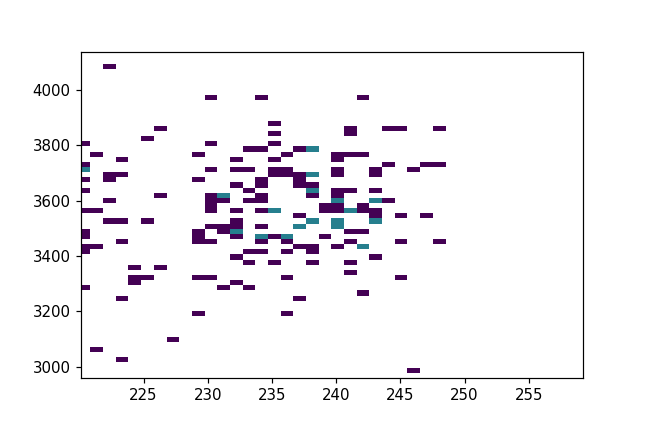

In [34]:
%matplotlib notebook
plt.hist2d(peakdf['pos'].values,heights.values,bins=500,norm=LogNorm());


In [41]:
mesh_df.head()

,EventID,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t502,t503,t504,t505,t506,t507,t508,t509,t510,t511
0,0,-776.700002,228.300000,52.300000,24.299999,-9.700001,-128.700002,-193.699999,9.299999,-25.700002,...,-108.699999,-221.699999,-325.699995,103.300000,116.300004,131.300000,-126.699996,-309.700000,639.300000,452.300001
1,1,-1137.500002,24.499999,193.500000,108.500000,21.500000,61.500000,77.500000,99.499998,-110.500000,...,-166.500003,-252.500004,-249.500000,-187.500000,101.499999,-146.500003,-285.500000,-444.500004,750.500004,474.500000
2,2,-1041.700007,-124.700000,-34.699998,69.300000,-94.700000,-82.699999,68.300000,37.300000,-65.700000,...,-475.699999,-357.699999,-235.700000,-399.699996,-246.699997,-330.699999,-408.700000,-95.699999,597.299999,309.300001
3,3,-1053.699998,-325.700000,-6.700002,-20.700001,166.300001,112.300000,-173.700001,-33.699998,93.300000,...,15.300001,-157.699998,0.300002,-40.699998,-179.699999,-185.700001,-216.700002,25.300003,842.300000,268.300002
4,4,-1115.699999,175.299999,-61.700000,-13.700000,151.300000,94.300001,-27.699999,17.299999,-22.700000,...,-414.700003,-467.700004,-544.699996,-398.699999,-289.700003,-167.700000,-151.699997,-136.700002,737.300000,317.300001


In [46]:
def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*2)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.iloc[:,1:].apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

<IPython.core.display.Javascript object>


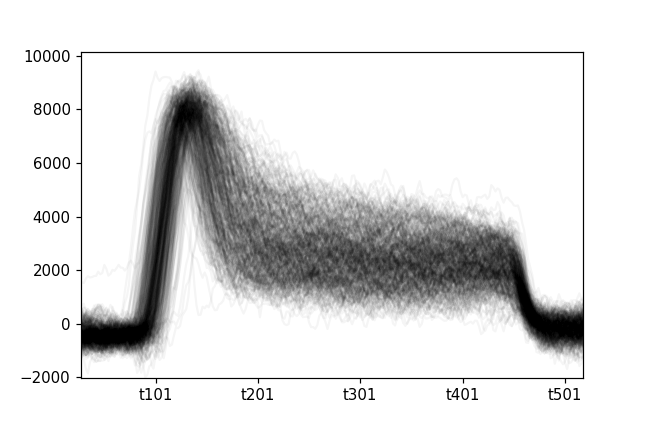

In [47]:
convol_df.ix[peakdf[(peakdf['pos']>180)&(peakdf['pos']<210) &(heights>3900)&(heights<5000)].index].iloc[:,2:].T.plot(legend=None,c=(0,0,0,0.04))

<IPython.core.display.Javascript object>


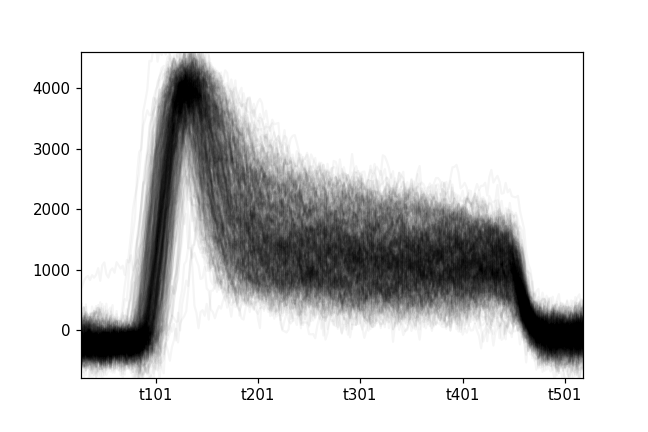

In [39]:
mesh_df.ix[peakdf[(peakdf['pos']>180)&(peakdf['pos']<210) &(heights>3900)&(heights<5000)].index].iloc[:,2:].T.plot(legend=None,c=(0,0,0,0.04))

In [ ]:
def Process(Event):

    mesh =  Event.iloc[:,3:].sum(axis=0)
    return mesh
mesh1_df = ADCdf.groupby('EventID').apply(Process)


In [ ]:
mesh1_df.ix[peakdf[(peakdf['pos']>190)&(peakdf['pos']<220) &(heights>5300)&(heights<6500)].index].iloc[:,2:].T.plot(legend=None,c=(1,0,0,0.05))

<IPython.core.display.Javascript object>


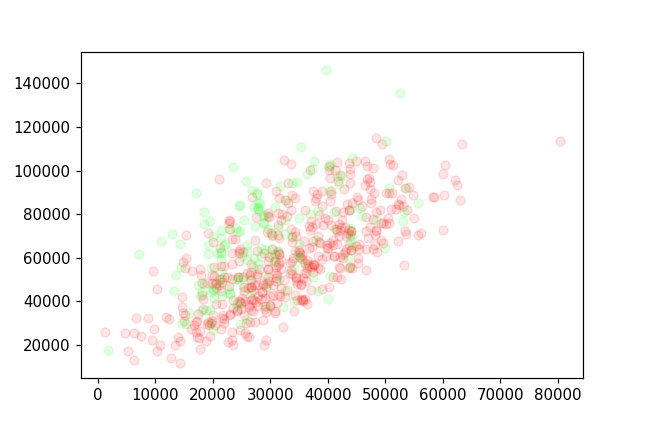

<IPython.core.display.Javascript object>


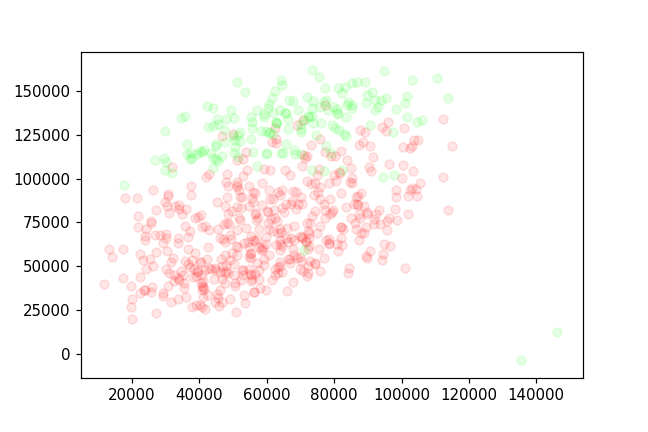

In [36]:
idx1 = peakdf[(peakdf['pos']>180)&(peakdf['pos']<220) &(heights>3900)&(heights<5000)].index
idx2 = peakdf[(peakdf['pos']>225)&(peakdf['pos']<250) &(heights<4000)&(heights>3000)].index

DE0a = mesh_df.ix[idx1].iloc[:,1:-1].iloc[:,350:400].sum(axis=1)
DE1a = mesh_df.ix[idx1].iloc[:,1:-1].iloc[:,300:350].sum(axis=1)
DE2a = mesh_df.ix[idx1].iloc[:,1:-1].iloc[:,250:300].sum(axis=1)

DE0b = mesh_df.ix[idx2].iloc[:,1:-1].iloc[:,350:400].sum(axis=1)
DE1b = mesh_df.ix[idx2].iloc[:,1:-1].iloc[:,300:350].sum(axis=1)
DE2b = mesh_df.ix[idx2].iloc[:,1:-1].iloc[:,250:300].sum(axis=1)

plt.figure()
plt.scatter(DE0a.values,DE1a.values,c=(1,0,0,0.1));
plt.scatter(DE0b.values,DE1b.values,c=(0,1,0,0.1));
plt.figure()
plt.scatter(DE1a.values,DE2a.values,c=(1,0,0,0.1));
plt.scatter(DE1b.values,DE2b.values,c=(0,1,0,0.1));

In [13]:
def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*10)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

ValueError: ('Wrong number of items passed 513, placement implies 512', u'occurred at index 0')

In [ ]:
convol_df.iloc[:,1:].T.plot(legend=None, c=(1,0,0,0.05))

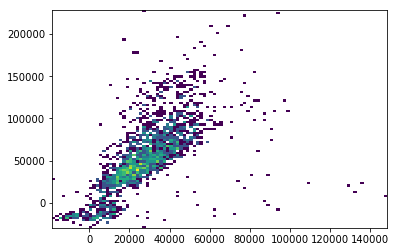

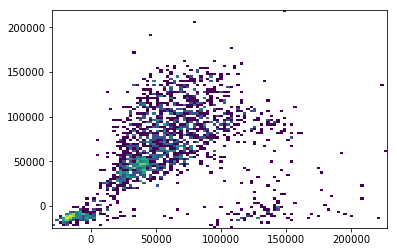

In [12]:


DE0 = mesh_df.iloc[:,1:-1].iloc[:,350:400].sum(axis=1)
DE1 = mesh_df.iloc[:,1:-1].iloc[:,300:350].sum(axis=1)
DE2 = mesh_df.iloc[:,1:-1].iloc[:,250:300].sum(axis=1)


plt.figure()
plt.hist2d(DE0.values,DE1.values,bins=100,norm=LogNorm())
plt.figure()

plt.hist2d(DE1.values,DE2.values,bins=100,norm=LogNorm());

#plt.scatter(DE0a.values,DE1a.values,c=(1,0,0,0.1));
#plt.scatter(DE0b.values,DE1b.values,c=(0,1,0,0.1));
#plt.figure()
#plt.scatter(DE1a.values,DE2a.values,c=(1,0,0,0.1));
#plt.scatter(DE1b.values,DE2b.values,c=(0,1,0,0.1));